In [1]:
import pandas as pd
import pysam

In [9]:
#download the comparison file
!wget https://s3.amazonaws.com/epiquest/epiquest_in409/KEUQHBKRRJVGTNRFQ7FEBCVDH4VKWTX4/Analysis/2888/CpG_result_table_filtered.txt.gz

--2016-12-04 01:11:36--  https://s3.amazonaws.com/epiquest/epiquest_in409/KEUQHBKRRJVGTNRFQ7FEBCVDH4VKWTX4/Analysis/2888/CpG_result_table_filtered.txt.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.16.163
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.16.163|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 83953872 (80M) [text/plain]
Saving to: ‘CpG_result_table_filtered.txt.gz’

CpG_result_table_fi 100%[=====================>]  80.06M  42.9MB/s   in 1.9s   

2016-12-04 01:11:38 (42.9 MB/s) - ‘CpG_result_table_filtered.txt.gz’ saved [83953872/83953872]



In [10]:
#download the alignment 
!wget https://s3.amazonaws.com/epiquest/epiquest_in409/KEUQHBKRRJVGTNRFQ7FEBCVDH4VKWTX4/Alignment/in409_9_chr21.bam
!wget https://s3.amazonaws.com/epiquest/epiquest_in409/KEUQHBKRRJVGTNRFQ7FEBCVDH4VKWTX4/Alignment/in409_9_chr21.bam.bai

--2016-12-04 01:12:04--  https://s3.amazonaws.com/epiquest/epiquest_in409/KEUQHBKRRJVGTNRFQ7FEBCVDH4VKWTX4/Alignment/in409_9_chr21.bam
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.0.91
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.0.91|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 559752366 (534M) [binary/octet-stream]
Saving to: ‘in409_9_chr21.bam’

in409_9_chr21.bam   100%[=====================>] 533.82M  47.9MB/s   in 12s    

2016-12-04 01:12:16 (44.2 MB/s) - ‘in409_9_chr21.bam’ saved [559752366/559752366]

--2016-12-04 01:12:16--  https://s3.amazonaws.com/epiquest/epiquest_in409/KEUQHBKRRJVGTNRFQ7FEBCVDH4VKWTX4/Alignment/in409_9_chr21.bam.bai
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.1.19
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.1.19|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 112120 (109K) [binary/octet-stream]
Saving to: ‘in409_9_chr21.bam.bai’

in409_9_chr21.bam.b 100%[

In [11]:
!gunzip *.gz

In [12]:
#read comparison table
df = pd.read_csv('CpG_result_table_filtered.txt', sep='\t')

In [13]:
df[:5]

,Unnamed: 0,chrom,chromstart,chromend,strand,6 meth_ratio,6 total number of reads,3372484 meth_ratio,3372484 total number of reads,meth diff,pvalue,classification
0,0,chr1,10488,10489,+,0,33,1,10,-1,5.216000e-10,stronglyHypometh
1,1,chr1,10489,10490,-,0,16,1,11,-1,7.670000e-08,stronglyHypometh
2,2,chr1,10492,10493,+,0,33,1,10,-1,5.216000e-10,stronglyHypometh
3,4,chr1,10496,10497,+,0,33,1,22,-1,9.432000e-11,stronglyHypometh
4,5,chr1,10497,10498,-,0,16,1,11,-1,7.670000e-08,stronglyHypometh


In [14]:
#filter out chr21 sites
df = df.loc[df['chrom'] == 'chr21']

In [15]:
df[:5]

,Unnamed: 0,chrom,chromstart,chromend,strand,6 meth_ratio,6 total number of reads,3372484 meth_ratio,3372484 total number of reads,meth diff,pvalue,classification
3780683,17048114,chr21,9413582,9413583,+,0.00,52,0.58,12,-0.58,0.000001,stronglyHypometh
3780684,17048115,chr21,9413583,9413584,-,0.04,25,0.82,11,-0.78,0.000005,stronglyHypometh
3780685,17048120,chr21,9417126,9417127,+,0.00,26,0.27,11,-0.27,0.021240,hypomethylated
3780686,17048121,chr21,9417127,9417128,-,0.01,87,0.14,37,-0.12,0.009013,hypomethylated
3780687,17048123,chr21,9418291,9418292,-,0.00,15,0.49,47,-0.49,0.000412,stronglyHypometh


In [16]:
a=df[:1]

In [17]:
dict={}
for row,i in df.iterrows():
    dict[i['chromstart']]=(i['6 meth_ratio'],i['3372484 meth_ratio'])
    

In [18]:
dict[9413582]

(0.0, 0.58)

In [117]:
PM0=float(countM)/float(countM+countF)
PF0=float(countF)/float(countM+countF)
print PM0,PF0

0.782450870926 0.217549129074


In [80]:
#extract reads from bamfile by position
samfile = pysam.AlignmentFile('in409_chr21.bam', 'rb')
countF=0
countM=0
for read in samfile:
    meth=read.tags[2][1]
    count=meth.count('z')+meth.count('Z')
    if count>=2:
        
        for i in range(len(meth)):
            if meth[i]=='z' and i+meth.pos in dict:
                
                
                
        

IndentationError: expected an indented block (<ipython-input-80-0831c244d87c>, line 9)

In [ ]:

summary=[]
approx_zero=0.001
count_limit=2
PM0=0.8
PF0=0.2
summary.append(0.2)
for k in range(10):
    countF=0
    countM=0
    samfile = pysam.AlignmentFile('in409_9_chr21.bam', 'rb')
    for read in samfile:
        meth=read.tags[2][1]
        count=meth.count('z')+meth.count('Z')
        if count>=count_limit:
            probF=1.0
            probM=1.0
            cc=0
            for i in range(len(meth)):
                if meth[i]=='z' and i+read.pos in dict:
                    (pf,pm)=dict[i+read.pos]
                    pf=1.0-pf
                    pm=1.0-pm
                    if pm==0.0:
                        probM*=approx_zero
                    else:
                        probM*=pm
                    if pf==0.0:
                        probF*=approx_zero
                    else:
                        probF*=pf
                    cc+=1
                elif meth[i]=='Z' and i+read.pos in dict:
                    (pf,pm)=dict[i+read.pos]
                    if pm==0.0:
                        probM*=approx_zero
                    else:
                        probM*=pm
                    if pf==0.0:
                        probF*=approx_zero
                    else:
                        probF*=pf
                    cc+=1
            prob_sumF=probF*PF0/(probF*PF0+probM*PM0)
            if prob_sumF>0.5 and cc>=count_limit:
                countF+=1
            elif cc>=count_limit:
                countM+=1
            
    PM0=float(countM)/float(countM+countF)
    PF0=float(countF)/float(countM+countF)
    summary.append(PF0)
                
                

In [21]:
summary

[0.2,
 0.2135536985069536,
 0.21800337989736274,
 0.2183987348641064,
 0.21841423898044932,
 0.21841423898044932,
 0.21841423898044932,
 0.21841423898044932,
 0.21841423898044932,
 0.21841423898044932,
 0.21841423898044932]

In [126]:
summary_08=summary

In [ ]:
summary_08

In [142]:
%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [153]:
summary_09=[0.3]+summary_09


In [32]:
summary

[0.2,
 0.2131168315622328,
 0.21788811530475144,
 0.21934163918407232,
 0.22009893733968486,
 0.22030047636496886,
 0.22032948577012337,
 0.22032948577012337,
 0.22032948577012337,
 0.22032948577012337,
 0.22032948577012337]

In [176]:
summary3=summary

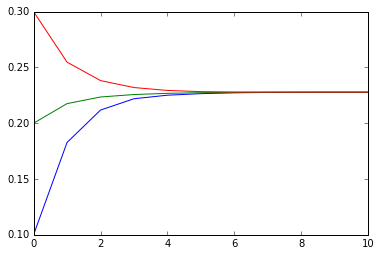

In [173]:
plot(summary_09)
plot(summary_08)
plot(summary_07)

In [185]:
summary

[0.2,
 0.25140139850902754,
 0.2612916807700881,
 0.26326478382550833,
 0.26346291969718233,
 0.2636858225528156,
 0.2636858225528156,
 0.2636858225528156,
 0.2636858225528156,
 0.2636858225528156,
 0.2636858225528156]

In [187]:
summary3

[0.2,
 0.24289984771287296,
 0.25230780800541464,
 0.2538908420914099,
 0.2540149278986257,
 0.2540149278986257,
 0.2540149278986257,
 0.2540149278986257,
 0.2540149278986257,
 0.2540149278986257,
 0.2540149278986257]

In [189]:
c=[summary_07,summary_08,summary_09]

In [190]:
c

[[0.3,
  0.25470384748493907,
  0.2381701074113688,
  0.23194215853160094,
  0.2293598382643801,
  0.2282746060356451,
  0.22792538989277655,
  0.22787527815927075,
  0.22787527815927075,
  0.22787527815927075,
  0.22787527815927075],
 [0.2,
  0.21754912907373158,
  0.22349050147751315,
  0.225684455810064,
  0.22676029208876666,
  0.22733031305739515,
  0.22762158750839764,
  0.22770771705036072,
  0.22772807494209746,
  0.22772807494209746,
  0.22772807494209746],
 [0.1,
  0.18274653015395265,
  0.211773751787188,
  0.22192450980545686,
  0.22509564294137083,
  0.22648154557114064,
  0.2272175616570071,
  0.2275933996583006,
  0.2277014530836725,
  0.22772807494209746,
  0.22772807494209746]]

In [207]:
file=open('converge.txt','w')

In [208]:
file.writelines( "%s\n" % item for item in c )

In [209]:
file.close()

In [204]:
c

[[0.3,
  0.25470384748493907,
  0.2381701074113688,
  0.23194215853160094,
  0.2293598382643801,
  0.2282746060356451,
  0.22792538989277655,
  0.22787527815927075,
  0.22787527815927075,
  0.22787527815927075,
  0.22787527815927075],
 [0.2,
  0.21754912907373158,
  0.22349050147751315,
  0.225684455810064,
  0.22676029208876666,
  0.22733031305739515,
  0.22762158750839764,
  0.22770771705036072,
  0.22772807494209746,
  0.22772807494209746,
  0.22772807494209746],
 [0.1,
  0.18274653015395265,
  0.211773751787188,
  0.22192450980545686,
  0.22509564294137083,
  0.22648154557114064,
  0.2272175616570071,
  0.2275933996583006,
  0.2277014530836725,
  0.22772807494209746,
  0.22772807494209746]]

In [33]:
PF0=0.220
PM0=1-PF0
countF=0
countM=0
j=0
count_limit=2
approx_zero=0.001
samfile = pysam.AlignmentFile('in409_9_chr21.bam', 'rb')
samfile1 = pysam.AlignmentFile('in450_7.bam', 'wb',template=samfile)
samfile2 = pysam.AlignmentFile('in450_8.bam', 'wb',template=samfile)
for read in samfile:
    meth=read.tags[2][1]
    count=meth.count('z')+meth.count('Z')
    if count>=count_limit:
        probF=1.0
        probM=1.0
        cc=0
        for i in range(len(meth)):
            if meth[i]=='z' and i+read.pos in dict:
                (pf,pm)=dict[i+read.pos]
                pf=1.0-pf
                pm=1.0-pm
                if pm==0.0:
                    probM*=approx_zero
                else:
                    probM*=pm
                if pf==0.0:
                    probF*=approx_zero
                else:
                    probF*=pf
                cc+=1
            elif meth[i]=='Z' and i+read.pos in dict:
                (pf,pm)=dict[i+read.pos]
                if pm==0.0:
                    probM*=approx_zero
                else:
                    probM*=pm
                if pf==0.0:
                    probF*=approx_zero
                else:
                    probF*=pf
                cc+=1
        prob_sumF=probF*PF0/(probF*PF0+probM*PM0)
        
        if prob_sumF>=0.95 and cc>=count_limit:
            samfile2.write(read)
        if prob_sumF<=0.05 and cc>=count_limit:
            samfile1.write(read)
samfile1.close()
samfile2.close()

In [30]:
PF0=0.228
PM0=1-PF0
countF=0
countM=0
j=0
samfile = pysam.AlignmentFile('in409_9_chr21.bam', 'rb')
samfile1 = pysam.AlignmentFile('in450_7.bam', 'wb',template=samfile)
samfile2 = pysam.AlignmentFile('in450_8.bam', 'wb',template=samfile)
for read in samfile:
    meth=read.tags[2][1]
    count=meth.count('z')+meth.count('Z')
    if count>=count_limit:
        probF=1.0
        probM=1.0
        cc=0
        for i in range(len(meth)):
            if meth[i]=='z' and i+read.pos in dict:
                (pf,pm)=dict[i+read.pos]
                pf=1.0-pf
                pm=1.0-pm
                probM*=pm
                probF*=pf
                cc+=1
            elif meth[i]=='Z' and i+read.pos in dict:
                (pf,pm)=dict[i+read.pos]
                probF*=pf
                probM*=pm
                cc+=1
        if probF==0.0 and probM==0.0:
            continue
        prob_sumF=probF*PF0/(probF*PF0+probM*PM0)
        if prob_sumF>=0.95 and cc>=count_limit:
            samfile2.write(read)
        if prob_sumF<=0.05 and cc>=count_limit:
            samfile1.write(read)
samfile1.close()
samfile2.close()

In [34]:
!samtools index in450_8.bam in450_8.bam.bai
!samtools index in450_7.bam in450_7.bam.bai

In [35]:
!wget https://s3.amazonaws.com/epiquest/epiquest_in450/7A2UXKANAD9RWCVJDEQXJG8BAB7XJH9U/db/in450_7_CpG_meth.db.gz
!wget https://s3.amazonaws.com/epiquest/epiquest_in450/7A2UXKANAD9RWCVJDEQXJG8BAB7XJH9U/db/in450_8_CpG_meth.db.gz

--2016-12-04 06:48:22--  https://s3.amazonaws.com/epiquest/epiquest_in450/7A2UXKANAD9RWCVJDEQXJG8BAB7XJH9U/db/in450_7_CpG_meth.db.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.16.91
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.16.91|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 947942 (926K) [binary/octet-stream]
Saving to: ‘in450_7_CpG_meth.db.gz’

in450_7_CpG_meth.db 100%[=====================>] 925.72K  --.-KB/s   in 0.03s  

2016-12-04 06:48:22 (33.9 MB/s) - ‘in450_7_CpG_meth.db.gz’ saved [947942/947942]

--2016-12-04 06:48:22--  https://s3.amazonaws.com/epiquest/epiquest_in450/7A2UXKANAD9RWCVJDEQXJG8BAB7XJH9U/db/in450_8_CpG_meth.db.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.16.91
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.16.91|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 604231 (590K) [binary/octet-stream]
Saving to: ‘in450_8_CpG_meth.db.gz’

in450_8_CpG_meth.db 100%[==

In [36]:
!gunzip *.gz

In [37]:
import sqlite3

In [47]:
with sqlite3.connect('in450_7_CpG_meth.db') as conn:
    dfm=pd.read_sql('SELECT * FROM sites where total_count>=10',conn)

In [48]:
with sqlite3.connect('in450_8_CpG_meth.db') as conn:
    dfc=pd.read_sql('SELECT * FROM sites where total_count>=10',conn)

In [50]:
dfm['ratio']=dfm['meth_count']/dfm['total_count']

In [51]:
dfc['ratio']=dfc['meth_count']/dfc['total_count']

In [52]:
df_m=pd.merge(dfm,df,how='inner',on=['chrom','pos'])

In [54]:
df_c=pd.merge(dfc,df,how='inner',on=['chrom','pos'])

In [58]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


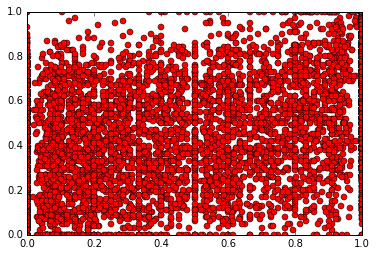

In [60]:
plt.plot(df_c['ratio'],df_c['6 meth_ratio'],'ro')

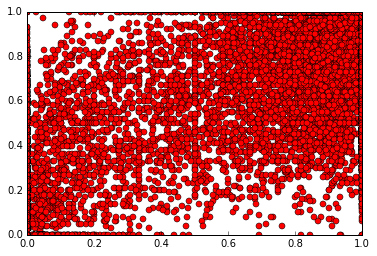

In [67]:
plt.plot(df_m['ratio'],df_m['3372484 meth_ratio'],'ro')

In [63]:
df_c1=df_c[['ratio','6 meth_ratio','3372484 meth_ratio']]

In [65]:
df_m1=df_m[['ratio','6 meth_ratio','3372484 meth_ratio']]

In [68]:
df_c.to_csv('child.csv')

In [69]:
df_m.to_csv('mother.csv')

In [66]:
df_m1.corr()

,ratio,6 meth_ratio,3372484 meth_ratio
ratio,1.000000,-0.487843,0.798546
6 meth_ratio,-0.487843,1.000000,-0.356271
3372484 meth_ratio,0.798546,-0.356271,1.000000


In [64]:
df_c1.corr()

,ratio,6 meth_ratio,3372484 meth_ratio
ratio,1.000000,0.607320,-0.435147
6 meth_ratio,0.607320,1.000000,-0.357038
3372484 meth_ratio,-0.435147,-0.357038,1.000000


In [223]:
readf=pd.DataFrame(columns=['name','is_reverse','probF','probM','count'])

In [45]:
df

,Unnamed: 0,chrom,pos,chromend,strand,6 meth_ratio,6 total number of reads,3372484 meth_ratio,3372484 total number of reads,meth diff,pvalue,classification
3780683,17048114,chr21,9413582,9413583,+,0.00,52,0.58,12,-0.58,1.275000e-06,stronglyHypometh
3780684,17048115,chr21,9413583,9413584,-,0.04,25,0.82,11,-0.78,5.453000e-06,stronglyHypometh
3780685,17048120,chr21,9417126,9417127,+,0.00,26,0.27,11,-0.27,2.124000e-02,hypomethylated
3780686,17048121,chr21,9417127,9417128,-,0.01,87,0.14,37,-0.12,9.013000e-03,hypomethylated
3780687,17048123,chr21,9418291,9418292,-,0.00,15,0.49,47,-0.49,4.124000e-04,stronglyHypometh
3780688,17048128,chr21,9421139,9421140,+,0.48,92,0.70,37,-0.22,3.090000e-02,hypomethylated
3780689,17048132,chr21,9421457,9421458,+,0.10,10,0.51,35,-0.41,2.876000e-02,stronglyHypometh
3780690,17048133,chr21,9421487,9421488,+,0.20,15,0.51,65,-0.31,4.342000e-02,hypomethylated
3780691,17048134,chr21,9421495,9421496,+,0.48,27,1.00,65,-0.52,1.592000e-09,stronglyHypometh
3780692,17048135,chr21,9421505,9421506,+,0.11,27,0.86,65,-0.75,9.226000e-12,stronglyHypometh


In [44]:
df=df.rename(columns={'chromstart':'pos'})

In [238]:
readf.rename(columns={'count':'num of CpGs'})

,name,is_reverse,probF,probM,num of CpGs
0,E00224:309:HT2JMCCXX:3:2205:3091:29314_1:N:0:G...,False,0.001392,0.998608,4
1,E00224:309:HT2JMCCXX:2:1223:4501:35450_2:N:0:G...,False,1.000000,0.000000,4
2,E00224:309:HT2JMCCXX:1:2201:11038:44134_1:N:0:...,False,1.000000,0.000000,4
3,E00224:308:HT3CGCCXX:8:1124:4319:27679_1:N:0:G...,False,1.000000,0.000000,4
4,E00224:308:HT3CGCCXX:8:1124:4319:27679_2:N:0:G...,False,1.000000,0.000000,4
5,E00224:309:HT2JMCCXX:3:2106:19077:70048_1:N:0:...,False,1.000000,0.000000,4
6,E00224:309:HT2JMCCXX:3:2106:19077:70048_2:N:0:...,False,1.000000,0.000000,4
7,E00224:309:HT2JMCCXX:1:2119:14195:15672_1:N:0:...,False,1.000000,0.000000,4
8,E00224:309:HT2JMCCXX:1:2119:14195:15672_2:N:0:...,False,1.000000,0.000000,4
9,E00224:308:HT3CGCCXX:8:1207:24304:50129_1:N:0:...,False,0.012892,0.987108,4


In [239]:
readf.to_csv('summary.csv')